In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import time

In [ ]:
# Loading Dataset
data_path = '/content/MergedDataFinal4.csv'
df = pd.read_csv(data_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1199 non-null   object 
 1   Item                1199 non-null   object 
 2   Year                1199 non-null   int64  
 3   Yield (100 hg/ha)   1199 non-null   int64  
 4   Pesticides (Tons)   1199 non-null   float64
 5   Rainfall (mm)       1199 non-null   float64
 6   Fertilizer (kg/ha)  1199 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 65.7+ KB


In [ ]:
df_processed = df.drop(['Item','Year'], axis=1)
df_processed

,Country,Yield (100 hg/ha),Pesticides (Tons),Rainfall (mm),Fertilizer (kg/ha)
0,Albania,55693,410.55,1485.0,79.08
1,Albania,66790,590.50,1485.0,76.47
2,Albania,59869,582.68,1485.0,87.08
3,Albania,67290,361.62,1485.0,82.79
4,Albania,69533,450.60,1485.0,78.15
...,...,...,...,...,...
1194,Zimbabwe,5803,2185.07,657.0,19.17
1195,Zimbabwe,4405,2185.07,657.0,31.78
1196,Zimbabwe,13933,2185.07,657.0,35.71
1197,Zimbabwe,13506,2185.07,657.0,32.39


In [ ]:
# Select features (X) and target variable (y)
features = ['Pesticides (Tons)', 'Rainfall (mm)', 'Fertilizer (kg/ha)']
target = 'Yield (100 hg/ha)'

X = df_processed[features]
y = df_processed[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Create a pipeline with StandardScaler and RandomForestRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Define the hyperparameter grid
param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100]
}

# Perform grid search
search = GridSearchCV(pipeline, param_grid=param_grid, cv=5).fit(X_train, y_train)

# Print the best hyperparameters
print("The best hyperparameters are ", search.best_params_)

The best hyperparameters are  {'ridge__alpha': 10}


In [ ]:
# Access the best estimator from the search results
best_estimator = search.best_estimator_

# Training the RandomForestRegressor model using the best estimator
start_training_time = time.time()
best_estimator.fit(X_train, y_train)
end_training_time = time.time()
training_time = end_training_time - start_training_time

# Make predictions using the best estimator
start_prediction_time = time.time()
y_pred = best_estimator.predict(X_test)
end_prediction_time = time.time()
prediction_time = end_prediction_time - start_prediction_time

In [ ]:
# Evaluate the model
r2 = r2_score(y_test, y_pred) # R^2
mae = mean_absolute_error(y_test, y_pred) # mean absolute error
mse = mean_squared_error(y_test, y_pred) # mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False) # root mean squared error
max_err = max_error(y_test, y_pred) # max error
mape = mean_absolute_percentage_error(y_test, y_pred) # mean absolute percentage error

print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_err:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

print(f"Training Time: {training_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

R-squared (R2): 0.25
Mean Absolute Error (MAE): 23254.10
Mean Squared Error (MSE): 1084118356.39
Root Mean Squared Error (RMSE): 32925.95
Max Error: 221853.44
Mean Absolute Percentage Error (MAPE): 0.82%
Training Time: 0.01 seconds
Prediction Time: 0.00568 seconds


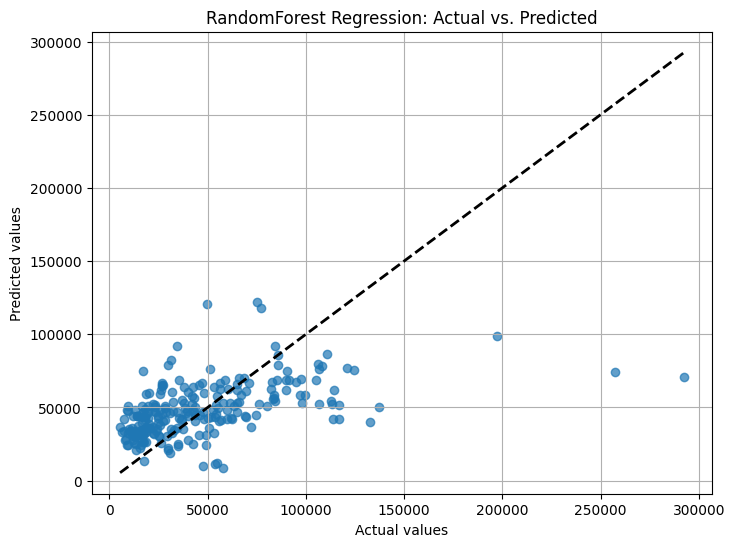

In [ ]:
# Visualize predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('RandomForest Regression: Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.grid(True)
plt.show()

Feature Importances based on Ridge Regression Coefficients (absolute values):
              Feature   Coefficient  Abs_Coefficient
2  Fertilizer (kg/ha)  18218.358203     18218.358203
1       Rainfall (mm) -10209.476568     10209.476568
0   Pesticides (Tons)   -565.408711       565.408711


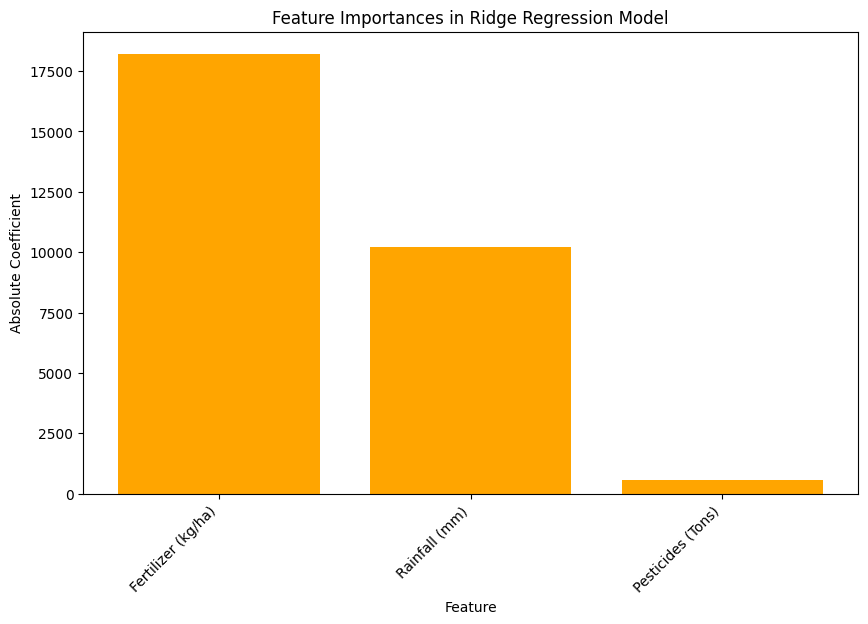

In [ ]:
# Get the coefficients from the best trained Ridge Regression model
coefficients = search.best_estimator_.named_steps['ridge'].coef_

# Create a DataFrame to store feature names and their coefficients
feature_coefficient_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})

# Sort features by absolute coefficient values in descending order
feature_coefficient_df['Abs_Coefficient'] = feature_coefficient_df['Coefficient'].abs()
feature_coefficient_df = feature_coefficient_df.sort_values(by='Abs_Coefficient', ascending=False)

# Print and plot feature importances based on absolute coefficients
print("Feature Importances based on Ridge Regression Coefficients (absolute values):")
print(feature_coefficient_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_coefficient_df['Feature'], feature_coefficient_df['Abs_Coefficient'], color='orange')
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title('Feature Importances in Ridge Regression Model')
plt.xticks(rotation=45, ha='right')
plt.show()